In [2]:
import pandas as pd          # Imports the pandas library, often used for handling and analyzing structured data, such as data in DataFrames.
import numpy as np           # Imports NumPy, a library for numerical operations, especially with arrays and matrices.
import tensorflow as tf      # Imports TensorFlow, a deep learning framework commonly used for building and training neural networks.
import matplotlib.pyplot as plt  # Imports Matplotlib's `pyplot` module, useful for data visualization and plotting.
import seaborn as sns        # Imports Seaborn, a visualization library based on Matplotlib, designed for creating more aesthetically pleasing plots.


In [3]:
from sklearn.model_selection import train_test_split  # Imports a function to split datasets into training and testing subsets.
from sklearn.preprocessing import StandardScaler      # Imports a class to standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
                                                     

In [4]:
RANDOM_SEED = 2021   #Helps make results consistent across different runs
TEST_PCT = 0.3       #Sets the test set size for data splitting
LABELS = ["Normal","Fraud"]  

In [7]:
dataset = pd.read_csv("creditcard.csv")

In [8]:
#check for any null values
print("Any nulls in the dataset",dataset.isnull().values.any())
print('-------')
print("No. of unique labels",len(dataset['Class'].unique())) #Retrieves an array of unique values in the "Class" column
print("Label values",dataset.Class.unique())

Any nulls in the dataset False
-------
No. of unique labels 2
Label values [0 1]


In [9]:
#0 is for normal credit card transcation
#1 is for fraudulent credit card transcation
print('-------')
print("Break down of Normal and Fraud Transcations")
print(pd.value_counts(dataset['Class'],sort=True))    #Counts the occurrences of each unique value in the Class column.


-------
Break down of Normal and Fraud Transcations
0    284315
1       492
Name: Class, dtype: int64


Text(0, 0.5, 'Number of Observations')

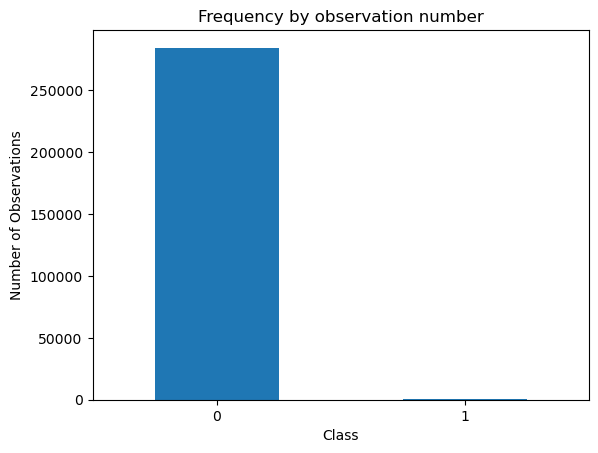

In [10]:
#visualizing the imbalanced dataset
count_classes = pd.value_counts(dataset['Class'],sort=True)    #Count occurrences of each class
count_classes.plot(kind='bar',rot=0)                  #Plots a bar chart where rot=0 keeps the x-axis labels
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique(
))       #Ensures the x-axis ticks correspond to unique class values (0 and 1)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [11]:
#Save the normal and fradulent transcations in seperate dataframe
normal_dataset = dataset[dataset.Class == 0]   
fraud_dataset = dataset[dataset.Class == 1]    

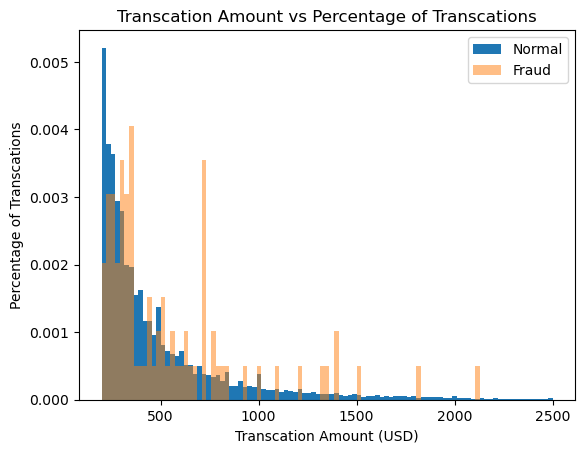

In [12]:
#Visualize transcation amounts for normal and fraudulent transcations
bins = np.linspace(200,2500,100)    #Creates an array of 100 evenly spaced values from 200 to 2500.

plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal')
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
#plt.hist(): Plots a histogram for the transaction amounts of normal transactions:
# bins=bins: Uses the defined bins to group transaction amounts.
# alpha=1: Sets full opacity for this histogram.
# density=True: Normalizes the histogram to show percentage rather than raw counts.

plt.legend(loc='upper right')
plt.title("Transcation Amount vs Percentage of Transcations")
plt.xlabel("Transcation Amount (USD)")
plt.ylabel("Percentage of Transcations")
plt.show()

In [13]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
sc = StandardScaler()     #Creates an instance of StandardScaler

dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1, 1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1, 1))
# fit_transform(): computes the mean and standard deviation for Time (or Amount) and scales them accordingly.
# reshape(-1, 1): Reshapes the Time and Amount data into a column format to fit the scaler’s requirements

raw_data = dataset.values     #returns all values in the dataset as a NumPy array

labels = raw_data[:, -1]      #selects the last column 
data = raw_data[:, 0:-1]      #selects all columns except the last one

#Splits Data for Training and Testing
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=2021)

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)    #Scaling Data to the [0, 1] Range  
test_data = (test_data - min_val) / (max_val - min_val)      #to avoid data leakage

train_data = tf.cast(train_data, tf.float32)     #tf.cast() converts the scaled train_data and test_data into tf.float32
test_data = tf.cast(test_data, tf.float32)

train_labels = train_labels.astype(bool)     #Converting Labels to Boolean Type
test_labels = test_labels.astype(bool)


In [15]:
#Creating Separate Datasets for Normal and Fraud Transactions
normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]
fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]

#~train_labels and ~test_labels give the inverse boolean values, identifying normal transactions.

print("No. of records in Fraud Train Data=", len(fraud_train_data))
print("No. of records in Normal Train Data=", len(normal_train_data))
print("No. of records in Fraud Test Data=", len(fraud_test_data))
print("No. of records in Normal Test Data=", len(normal_test_data))


No. of records in Fraud Train Data= 389
No. of records in Normal Train Data= 227456
No. of records in Fraud Test Data= 103
No. of records in Normal Test Data= 56859


In [16]:
nb_epoch = 50     
batch_size = 64   #number of samples per batch used in each iteration

input_dim = normal_train_data.shape[1]    #Input Dimension:set to the number of features
encoding_dim = 14            #Encoding Dimension:sets the size of the encoded representation layer

hidden_dim1 = int(encoding_dim / 2)   #half the encoding dimension, set to provide a smaller, intermediate hidden layer.
hidden_dim2 = 4       #specifies an even smaller layer size

learning_rate = 1e-7    #sets a very small learning rate to avoid overshooting

In [17]:
#Creating the input layer
input_layer = tf.keras.layers.Input(shape=(input_dim,))

In [ ]:
# This code builds a simple autoencoder that compresses and reconstructs data. 
# The encoder compresses the input, while the decoder reconstructs it back to the original form.

In [19]:
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim2, activation=tf.nn.leaky_relu)(encoder)


In [20]:
#Decoder
decoder = tf.keras.layers.Dense(hidden_dim1, activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)


In [21]:
#Autoencoder Model
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)   #Combines the encoder and decoder layers into a single model
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [22]:
#ModelCheckpoint Callback
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5", mode='min', monitor='val_loss', verbose=2, save_best_only=True)
#Saves the model's weights to "autoencoder_fraud.h5" only when val_loss is minimized, 
#preserving the best model based on validation loss


#EarlyStopping Callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=11, mode='min', restore_best_weights=True)
#Stops training if validation loss doesn't improve significantly (min_delta) over a set number of epochs (patience)

#Model Compilation
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')
#Sets up the autoencoder model for training.


In [23]:
#Model Training

history = autoencoder.fit(
    normal_train_data,
    normal_train_data,
    epochs=nb_epoch,
    batch_size=batch_size,
    shuffle=True,            #Randomizes order each epoch
    validation_data=(test_data, test_data),
    verbose=1,
    callbacks=[cp, early_stop]
).history

# Trains the autoencoder on the normal_train_data with set parameters.

#This code trains the autoencoder with model saving and early stopping based on validation loss, 
#compiling it with MSE and tracking accuracy

Epoch 1/50


2024-11-06 23:43:10.087252: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3473/3554 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.0339
Epoch 1: val_loss improved from inf to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 2s 574us/step - loss: 0.0036 - accuracy: 0.0342 - val_loss: 2.0150e-05 - val_accuracy: 0.0420
Epoch 2/50
3491/3554 [============================>.] - ETA: 0s - loss: 1.9327e-05 - accuracy: 0.0662
Epoch 2: val_loss improved from 0.00002 to 0.00002, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 2s 545us/step - loss: 1.9475e-05 - accuracy: 0.0661 - val_loss: 2.0022e-05 - val_accuracy: 0.0420
Epoch 3/50
3484/3554 [============================>.] - ETA: 0s - loss: 1.9449e-05 - accuracy: 0.0619
Epoch 3: val_loss did not improve from 0.00002
3554/3554 [==============================] - 2s 542us/step - loss: 1.9456e-05 - accuracy: 0.0622 - val_loss: 2.0194e-05 - val_accuracy: 0.2168
Epoch 4/50
3486/3554 [============================>.] - ETA: 0s

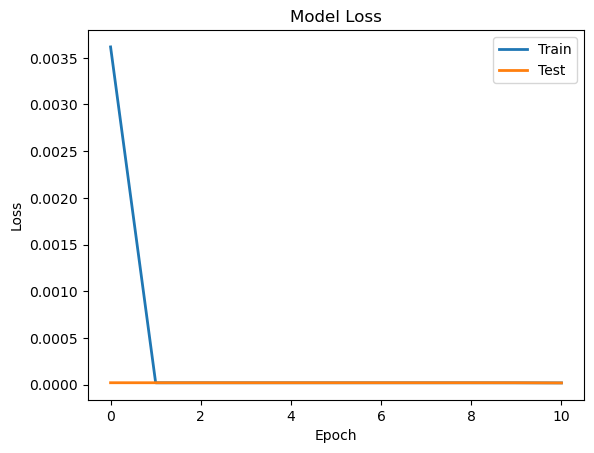

In [25]:
plt.plot(history['loss'],linewidth = 2,label = 'Train')
plt.plot(history['val_loss'],linewidth = 2,label = 'Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

1781/1781 [==============================] - 1s 245us/step


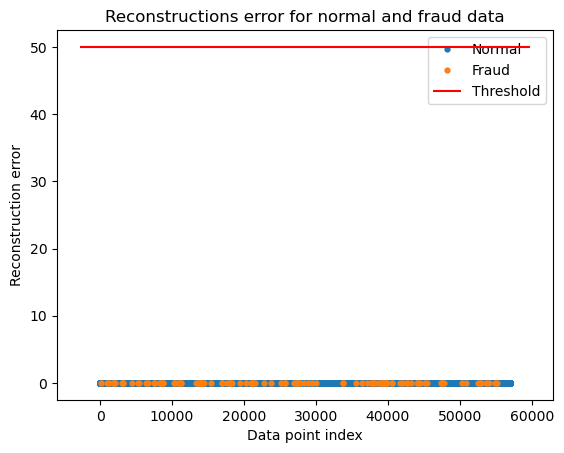

In [26]:
#Prediction and Reconstruction Error Calculation
test_x_predictions = autoencoder.predict(test_data)    #predicts the output (reconstructed data) for the test set
mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)   #Calculates the MSE between the original data and the reconstructed data


#Creating DataFrame for Reconstruction Errors
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': test_labels})

threshold_fixed = 50   #Setting the Threshold for Anomaly Detection:

groups = error_df.groupby('True_class')   #group the data 

#Plotting the Reconstruction Errors
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='', label="Fraud" if name == 1 else "Normal")

ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label="Threshold")
#Draws a horizontal red line (colors="r") at the threshold_fixed value (50).


ax.legend()
plt.title("Reconstructions error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()



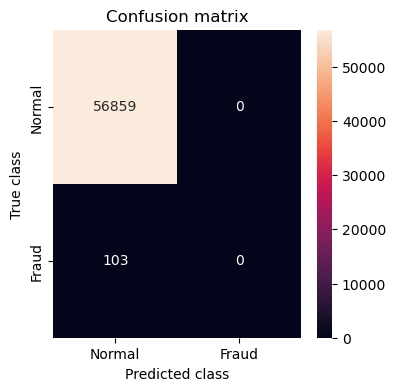

In [28]:
#Thresholding the Reconstruction Error
threshold_fixed = 52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]

#Adding Predictions to the DataFrame
error_df['pred'] = pred_y

#Confusion Matrix Calculation
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

#Plotting the Confusion Matrix
plt.figure(figsize = (4,4))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()


In [29]:
# Print Accuracy, Precision, and Recall
print("Accuracy :", accuracy_score(error_df['True_class'], error_df['pred']))
print("Recall :", recall_score(error_df['True_class'], error_df['pred']))
print("Precision :", precision_score(error_df['True_class'], error_df['pred']))


Accuracy : 0.9981917769741231
Recall : 0.0
Precision : 0.0


/Users/e1even/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
